# Introduction to NumPy

![](https://numfocus.org/wp-content/uploads/2016/07/numpy-logo-300.png)

* most fundamental third-party package for scientific computing in Python 
* multidimensional **array** data structures
* associated functions and methods to manipulate them. 
* Other third-party packages, including **pandas**, use NumPy arrays as backends for more specialized data structures


### Comparison to Python

* While Python comes with several container types (`list`,`tuple`,`dict`), 
* NumPy's arrays are implemented closer to the hardware, and are therefore more **efficient** than the built-in types.
* This is particularly true for large data, for which NumPy scales much better than Python's built-in data structures.
* NumPy arrays also retain a suite of associated functions and methods that allow for efficient *array-oriented* computing.

## Import Convention

* By convention numpy is imported

In [1]:
import numpy as np

## NumPy Arrays and Indexing

You can index an array in the same way you can index Python lists using **slice notation**

In [5]:
lst = list(range(1000))
lst[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
arr = np.arange(1000)
arr[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Other slicing operations:

In [7]:
arr[10:20]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [8]:
arr[10:20:2]

array([10, 12, 14, 16, 18])

In [9]:
arr[-1]

999

In [13]:
arr[-10:]

array([990, 991, 992, 993, 994, 995, 996, 997, 998, 999])

### Arrays vs Lists

`arr` is fundamentally a different data structure than `lst`

In [14]:
type(arr)

numpy.ndarray

One of the biggest benefits it provides over built-in types is *vectorized* methods and functions.

In [15]:
%timeit [i ** 2 for i in lst]

297 µs ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%timeit arr ** 2

1.18 µs ± 39.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Arrays are **homogeneously typed** 
  * we see why when we think about the memory layout

Lists can contain elements of arbitrary type

In [17]:
['a', 2, (1, 3)]

['a', 2, (1, 3)]

Let's assign a string to our list of integers:

In [18]:
lst[0] = 'some other type'

In [19]:
lst[:3]

['some other type', 1, 2]

We can't do this with an array

In [20]:
arr[0] = 'some other type'

ValueError: invalid literal for int() with base 10: 'some other type'

The data type is contained in the `dtype` attribute

In [21]:
arr.dtype

dtype('int64')

The dtype is fixed, and other types will be cast to this type (when possible).

In [22]:
arr[0] = 1.234

In [23]:
arr[:10]

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### What is an Array?

We can think of an array as a block of memory, with some extra information on how to intepret its contents.

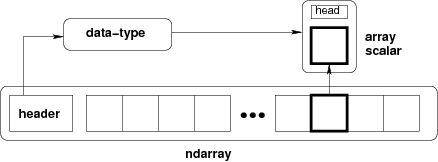

In [24]:
from IPython.display import Image
Image("https://docs.scipy.org/doc/numpy/_images/threefundamental.png")

An array is made up of: 

1. the ndarray itself
2. the data-type object that describes the layout of a single fixed-size element
3. the array-scalar Python object returned when an element is accessed

### Array Creation

In [25]:
np.zeros(5, dtype=float)

array([0., 0., 0., 0., 0.])

In [26]:
np.zeros(5, dtype=int)

array([0, 0, 0, 0, 0])

In [27]:
np.zeros(5, dtype=complex)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [28]:
np.ones(5, dtype=float)

array([1., 1., 1., 1., 1.])

We have seen above how `arange` generates an array for a range of integers. Similarly, `linspace` and `logspace` create linearly and logarithmically-spaced **grids** respectively, with a fixed number of points and including both ends of the specified interval:

In [29]:
np.linspace(0, 1, num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [30]:
np.logspace(1, 4, num=4)

array([   10.,   100.,  1000., 10000.])

### Random Number Generation

Finally, it is often useful to create arrays with random numbers that follow a specific **distribution**.  The `np.random` module contains a number of functions that can be used to this effect, for example this will produce an array of 5 random samples taken from a **standard normal** distribution (0 mean and variance 1) $ X \sim N(0, 1) $:

$$f(x \mid \mu=0, \sigma=1) = \sqrt{\frac{1}{2\pi \sigma^2}} \exp\left\{ -\frac{x^2}{2\sigma^2} \right\}$$ 

In [31]:
np.random.randn(5)

array([-0.35620466,  0.39522804,  0.98817278, -0.043254  , -1.06739429])

$X \sim N(9, 3)$

In [33]:
norm10 = np.random.normal(loc=9, scale=3, size=10)
norm10

array([11.83265292, 10.18399228, 10.75236362, 10.822628  ,  8.53816002,
       13.24934468, 10.64297439, 12.30095352,  9.70318937,  4.35152081])

To make simulation results replicable, a random number seed can be set.

In [40]:
np.random.seed(42)

In [41]:
np.random.exponential(size=5)

array([0.46926809, 3.01012143, 1.31674569, 0.91294255, 0.16962487])

In [42]:
np.random.seed(42)

In [43]:
np.random.exponential(size=5)

array([0.46926809, 3.01012143, 1.31674569, 0.91294255, 0.16962487])

## Exercise: Random numbers

Generate a NumPy array of 1000 random numbers sampled from a Poisson distribution, with parameter `lam=5`. What is the modal value in the sample?

In [34]:
# Write your answer here

## Index Arrays

We showed how to index with numbers and **slices**

NumPy indexing is much more powerful than Python indexing. For example, you can index with other arrays:
  * Boolean arrays
  * Integer arrays

Consider for example that in the array `norm10` we want to replace all values above 9 with the value 0.  We can do so by first finding the *mask* that indicates where this condition is `True` or `False`:

### Boolean Indexing

In [35]:
mask = norm10 > 9
mask

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False])

In [36]:
norm10[mask]

array([11.83265292, 10.18399228, 10.75236362, 10.822628  , 13.24934468,
       10.64297439, 12.30095352,  9.70318937])

### Integer Indexing

Likewise you can index with integer arrays or lists.

In [37]:
norm10[[1, 4, 6]]

array([10.18399228,  8.53816002, 10.64297439])

This form of indexing is known as **fancy-indexing**

### Asssignment

You can use fancy-indexing for assignment; this is particularly useful for assignment given some condition.

In [38]:
norm10[norm10 > 9] = 0
norm10

array([0.        , 0.        , 0.        , 0.        , 8.53816002,
       0.        , 0.        , 0.        , 0.        , 4.35152081])

In [39]:
norm10[[1, 4, 7]] = 10
norm10

array([ 0.        , 10.        ,  0.        ,  0.        , 10.        ,
        0.        ,  0.        , 10.        ,  0.        ,  4.35152081])

### Copies vs Views

A common **gotcha** for new NumPy users is the difference between *copies* of arrays and *views*, and their implications for assignment.

When we use slice notation to look at part of an array, it produces a **view**
* That is, it points to the same memory of the original array

In [44]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
y = x[::2]
y

array([0, 2, 4, 6, 8])

In [46]:
y[3] = 100
y

array([  0,   2,   4, 100,   8])

In [47]:
x

array([  0,   1,   2,   3,   4,   5, 100,   7,   8,   9])

Integer fancy indexing, however, produces a **copy**, and therefore operating on the copy will not affect the original array.

In [48]:
a = norm10[[0, 1, 5]]
a

array([ 0., 10.,  0.])

In [49]:
a[:] = -10
a

array([-10., -10., -10.])

In [50]:
norm10

array([ 0.        , 10.        ,  0.        ,  0.        , 10.        ,
        0.        ,  0.        , 10.        ,  0.        ,  4.35152081])

### Exercise

Create an array `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]` without typing the values by hand. Assign 100 to elements 2 to 5 (zero-index). Print the array.


Create the same array as in step one above. Create an array from a slice of elements 2 to 5. Assign 100 to the slice. *Hint* try `[:]` to address all of the *elements* of an array. Print the original array and the slice.

In [51]:
# Write your answer here

## Multidimensional Arrays

NumPy can create arrays of aribtrary dimensions, and all the methods illustrated in the previous section work with more than one dimension. 

For example, a list of lists can be used to initialize a two dimensional array:

In [64]:
samples_array = np.random.randint(0, 1000, size=(2, 4))

In [65]:
samples_array.shape

(2, 4)

In [66]:
print(samples_array)

[[254 316  37 659]
 [536 385 632 927]]


With two-dimensional arrays we start seeing the convenience of NumPy data structures.

Specifically, hile a nested list can be indexed across dimensions using consecutive `[ ]` operators, multidimensional arrays support a more natural indexing syntax with a single set of brackets and a set of comma-separated indices:

In [68]:
samples_array[0,1]

316

In [69]:
samples_array.tolist()[0,1]

TypeError: list indices must be integers or slices, not tuple

In [70]:
samples_array.tolist()[0][1]

316

As above, most of the array creation functions listed above can be passed multidimensional shapes.

In [71]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [72]:
np.random.normal(10, 3, size=(2, 4))

array([[ 8.05662987,  6.81007374, 10.45353893, 13.96393514],
       [ 8.92464218, 11.34882474,  7.74315999, 10.58441475]])

In fact, an array can be **reshaped** at any time, as long as the total number of elements is unchanged.  For example, if we want a 2x4 array with numbers increasing from 0, the easiest way to create it is via the array's `reshape` method.

In [73]:
arr = np.arange(8).reshape(2,4)
arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

`ndarrays` can be transposed using the `np.transpose` function, or the handy `T` transpose accessor.

In [75]:
arr.T

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

With multidimensional arrays, you can also use slices, and you can mix and match slices and single indices in the different dimensions (using the same array as above):

In [76]:
arr[1, 2:4]

array([6, 7])

In [77]:
arr[:, 2]

array([2, 6])

If you only provide one index, then you will get the corresponding row.

In [78]:
arr[1]

array([4, 5, 6, 7])

Now that we have seen how to create arrays with more than one dimension, it's a good idea to look at some of the most useful **properties and methods** that arrays have.  The following provide basic information about the size, shape and data in the array:

In [79]:
print('Data type                :', samples_array.dtype)
print('Total number of elements :', samples_array.size)
print('Number of dimensions     :', samples_array.ndim)
print('Shape (dimensionality)   :', samples_array.shape)
print('Memory used (in bytes)   :', samples_array.nbytes)

Data type                : int64
Total number of elements : 8
Number of dimensions     : 2
Shape (dimensionality)   : (2, 4)
Memory used (in bytes)   : 64


Arrays also have many useful methods, some especially useful ones are:

In [80]:
print('Minimum and maximum             :', samples_array.min(), samples_array.max())
print('Sum, mean and standard deviation:', samples_array.sum(), samples_array.mean(), samples_array.std())

Minimum and maximum             : 37 927
Sum, mean and standard deviation: 3746 468.25 259.8633054126727


For these methods, the above operations area all computed on all the elements of the array.  But for a multidimensional array, it's possible to do the computation along a single dimension, by passing the `axis` parameter; for example:

In [81]:
samples_array.sum(axis=0)

array([ 790,  701,  669, 1586])

In [82]:
samples_array.sum(axis=1)

array([1266, 2480])

Notice that summing over the rows returned a 1d array above.

If you want to preserve the dimensions use the `keepdims` keyword

In [83]:
samples_array.sum(axis=1, keepdims=True)

array([[1266],
       [2480]])

There is a wide variety of methods and properties of arrays.       

In [84]:
[attr for attr in dir(samples_array) if not attr.startswith('__')]

['T',
 'all',
 'any',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'astype',
 'base',
 'byteswap',
 'choose',
 'clip',
 'compress',
 'conj',
 'conjugate',
 'copy',
 'ctypes',
 'cumprod',
 'cumsum',
 'data',
 'diagonal',
 'dot',
 'dtype',
 'dump',
 'dumps',
 'fill',
 'flags',
 'flat',
 'flatten',
 'getfield',
 'imag',
 'item',
 'itemset',
 'itemsize',
 'max',
 'mean',
 'min',
 'nbytes',
 'ndim',
 'newbyteorder',
 'nonzero',
 'partition',
 'prod',
 'ptp',
 'put',
 'ravel',
 'real',
 'repeat',
 'reshape',
 'resize',
 'round',
 'searchsorted',
 'setfield',
 'setflags',
 'shape',
 'size',
 'sort',
 'squeeze',
 'std',
 'strides',
 'sum',
 'swapaxes',
 'take',
 'tobytes',
 'tofile',
 'tolist',
 'tostring',
 'trace',
 'transpose',
 'var',
 'view']

### What is a Multi-Dimensional Array

Memory is a linear address space. Therefore, by adding information on `shape` and `strides` we can interpet bytes laid out linearly in memory as a multidimensional object.

![](https://ipython-books.github.io/pages/chapter04_optimization/images/layout.png)

In [92]:
arr.shape

(2, 4)

In [91]:
arr.strides

(32, 8)

### Exercises: Matrix Creation

Generate the following structure as a numpy array, without typing the values by hand. Then, create another array containing just the 2nd and 4th rows.

        [[1,  6, 11],
         [2,  7, 12],
         [3,  8, 13],
         [4,  9, 14],
         [5, 10, 15]]

In [93]:
# Write your answer here

## Array Operations, Methods, and Functions

One of the key advantages of using NumPy arrays is that functions and methods are vectorized, which allows us to avoid writing costly Python loops.

Let's create two arrays of random integers, and add them element-wise:

In [96]:
np.random.seed(42)
sample1, sample2 = np.random.randint(0, 1000, size=(2, 4))

sample_sum = sample1 + sample2

In [97]:
np.array([632, 1638, 569, 115])

array([ 632, 1638,  569,  115])

This includes the multiplication operator. 

Note that it does not perform matrix multiplication, as is the case in Matlab, for example:

In [98]:
print('{0} X {1} = {2}'.format(sample1, sample2, sample1 * sample2))

[102 435 860 270] X [106  71 700  20] = [ 10812  30885 602000   5400]


In Python 3.5, you can use the `@` operator to get the inner product (or dot product).

In [99]:
print('{0} . {1} = {2}'.format(sample1, sample2, sample1 @ sample2))

[102 435 860 270] . [106  71 700  20] = 649097


This implies that the dimension of the arrays for each operation must match in size, however, NumPy will **broadcast** dimensions when possible.

For example, suppose that you want to add the number 1.5 to each element of `sample1`:

In [100]:
sample1 + 1.5

array([103.5, 436.5, 861.5, 271.5])

In this case, numpy looked at both operands and saw that the first was a one-dimensional array of length 4 and the second was a scalar, considered a zero-dimensional object. The broadcasting rules allow numpy to:

* create new array of length 1
* extend the array to match the size of the corresponding array

So in the above example, the scalar 1.5 is effectively cast to a 1-dimensional array of length 1, then stretched to length 4 to match the dimension of arr1. After this, element-wise addition can proceed as now both operands are one-dimensional arrays of length 4.

This broadcasting behavior is powerful, especially because when NumPy broadcasts to create new dimensions or to stretch existing ones, it doesn't actually replicate the data. In the example above the operation is carried as if the 1.5 was a 1-d array with 1.5 in all of its entries, but no actual array was ever created. This saves memory and improves the performance of operations.

When broadcasting, NumPy compares the sizes of each dimension in each operand. It starts with the trailing dimensions, working forward and creating dimensions as needed to accomodate the operation. Two dimensions are considered compatible for operation when:

* they are equal in size
* one is scalar (or size 1)

If these conditions are not met, an exception is thrown, indicating that the arrays have incompatible shapes.

In [104]:
c = np.array([-100, 100])
sample1 + c

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [102]:
b = np.array([10, 20, 30, 40])

bcast_sum = sample1 + b

In [103]:
print('{0}\n\n+ {1}\n{2}\n{3}'.format(sample1, b, '-'*21, bcast_sum))

[102 435 860 270]

+ [10 20 30 40]
---------------------
[112 455 890 310]


Remember that matching begins at the **trailing** dimensions. Here, `c` would need to have a trailing dimension of 1 for the broadcasting to work. We can augment arrays with dimensions on the fly, by indexing it with a `np.newaxis` object, which adds an "empty" dimension:

In [106]:
cplus = c[:, np.newaxis]
cplus

array([[-100],
       [ 100]])

In [107]:
cplus.shape

(2, 1)

In [108]:
sample1 + cplus

array([[  2, 335, 760, 170],
       [202, 535, 960, 370]])

In [109]:
sample1[:, np.newaxis] + c

array([[  2, 202],
       [335, 535],
       [760, 960],
       [170, 370]])

### Exercises: Array Manipulation

Divide each column of the array:

```python
a = np.arange(25).reshape(5, 5)
```

elementwise with the array 

```python
b = np.array([1., 5, 10, 15, 20])
```

In [85]:
# Write answer here